<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/text_wordcloud1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  to demonstrate how to print texts using `wordcloud` package

###  Source: I modified the code by the famous book "*Automate the Boring Stuff with Python*" by Al Sweigart, 2nd edition @2020
#### https://automatetheboringstuff.com/2e/chapter12/#:~:text=The%20iter_content()%20method,be%20on%20your%20computer

In [9]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install --user requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests    # to download files through url

In [3]:
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')
type(res)

requests.models.Response

In [11]:
res.status_code == requests.codes.ok   # checkinf for error

True

In [5]:
len(res.text)   #178,000 characters long

178978

In [14]:
print(res.text[:500])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: Romeo and Juliet

Author: William Shakespeare

Posting Date: May 25, 2012 [EBook #1112]
Release Date: November, 1997  [Etext #1112]

Language: Eng


In [16]:
res.raise_for_status()  # checking for error

In [41]:
playFile = open('RomeoAndJuliet.txt', 'wb') 
 # to write binary data instead of text data 
 # to maintain the Unicode encoding of the text. refer to the book

In [42]:
for chunk in res.iter_content(200000):
  playFile.write(chunk)

In [43]:
playFile.close()

In [47]:
with open("RomeoAndJuliet.txt", 'r') as fh:  
    filedata = fh.read()

print(type(filedata))
print(len(filedata))
print('---------------')
print(filedata[:500])


<class 'str'>
174126
---------------
The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: Romeo and Juliet

Author: William Shakespeare

Posting Date: May 25, 2012 [EBook #1112]
Release Date: November, 1997  [Etext #1112]

Language: English


*** STAR


In [48]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=30, \
                      background_color="white").generate(filedata)

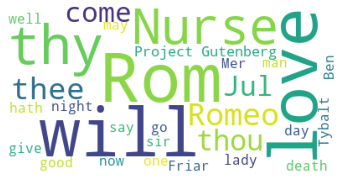

In [38]:
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

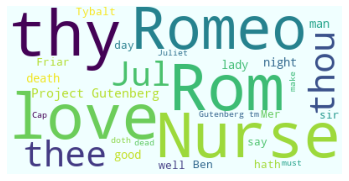

In [49]:
#Add more words to ignore 
stopwords.update(["many","using", "want", "value", "will", "come", "give", "may", "one", "now", "go", "yet", "let"])

#Redo stop words. Limit number of words
wordcloud = WordCloud(stopwords=stopwords, max_words=30, \
                      background_color="azure").generate(filedata)

mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()